In [ ]:
# Cell 1: Install Required Packages for Google Colab
!pip install qiskit
!pip install qiskit-aer
!pip install matplotlib
!pip install numpy
!pip install pylatexenc


In [ ]:
# Cell 2: Import Libraries with Correct Syntax
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

%matplotlib inline

import qiskit


In [ ]:
# Cell 3: Create Quantum Teleportation Circuit
def create_teleportation_circuit():
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr, cr)

    qc.x(0)
    qc.barrier()

    qc.h(1)
    qc.cx(1, 2)
    qc.barrier()

    qc.cx(0, 1)
    qc.h(0)
    qc.barrier()

    qc.measure([0, 1], [0, 1])
    qc.barrier()

    qc.cx(1, 2)
    qc.cz(0, 2)
    qc.measure(2, 2)

    return qc

teleport_circuit = create_teleportation_circuit()
print(teleport_circuit.draw())


      ┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░            
q0_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░───────■────
      └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │    
q0_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───■───┼────
            ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ ┌─┐
q0_2: ──────░──────┤ X ├─░────────────░──╫──╫──░─┤ X ├─■─┤M├
            ░      └───┘ ░            ░  ║  ║  ░ └───┘   └╥┘
c0: 3/═══════════════════════════════════╩══╩═════════════╩═
                                         0  1             2 


In [ ]:
# Cell 4: Execute Circuit
def execute_teleportation(circuit, shots=1024):
    simulator = AerSimulator()
    transpiled_circuit = transpile(circuit, simulator)
    job = simulator.run(transpiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts()
    return counts

counts = execute_teleportation(teleport_circuit)
print(f"Results: {counts}")


Results: {'111': 266, '110': 247, '101': 258, '100': 253}


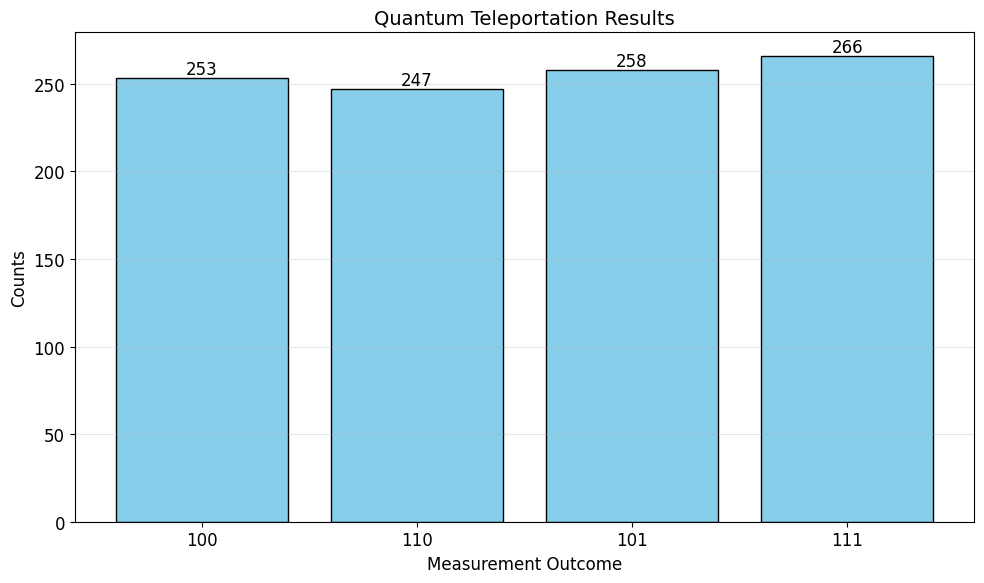

In [ ]:
# Cell 5: Visualization with Matplotlib
def plot_results_matplotlib(counts, title="Results"):
    outcomes = list(counts.keys())
    frequencies = list(counts.values())

    sorted_data = sorted(zip(outcomes, frequencies),
                        key=lambda x: int(x[0][::-1], 2))
    outcomes, frequencies = zip(*sorted_data)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(outcomes, frequencies, color='skyblue', edgecolor='black')

    plt.title(title, fontsize=14)
    plt.xlabel('Measurement Outcome')
    plt.ylabel('Counts')
    plt.grid(axis='y', alpha=0.3)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_results_matplotlib(counts, "Quantum Teleportation Results")


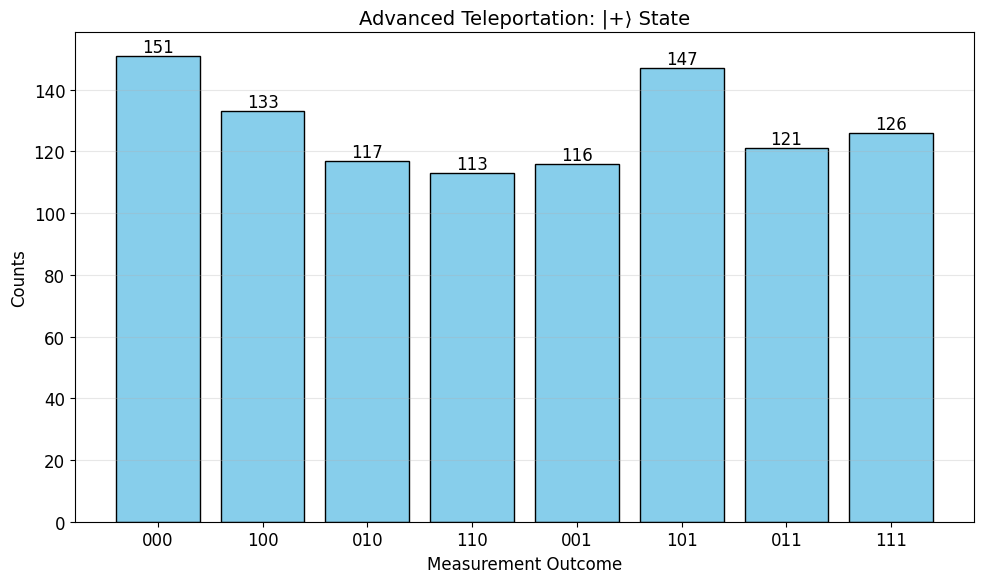

In [ ]:
# Cell 6: Advanced Teleportation with Different States
def create_advanced_teleportation(state_params=None):
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr, cr)

    if state_params is None:
        qc.x(0)
    else:
        qc.initialize(state_params, 0)

    qc.barrier()

    qc.h(1)
    qc.cx(1, 2)
    qc.barrier()

    qc.cx(0, 1)
    qc.h(0)
    qc.barrier()

    qc.measure([0, 1], [0, 1])
    qc.barrier()

    qc.cx(1, 2)
    qc.cz(0, 2)
    qc.measure(2, 2)

    return qc

plus_state = [1/np.sqrt(2), 1/np.sqrt(2)]
advanced_circuit = create_advanced_teleportation(plus_state)

advanced_counts = execute_teleportation(advanced_circuit)
plot_results_matplotlib(advanced_counts, "Advanced Teleportation: |+⟩ State")


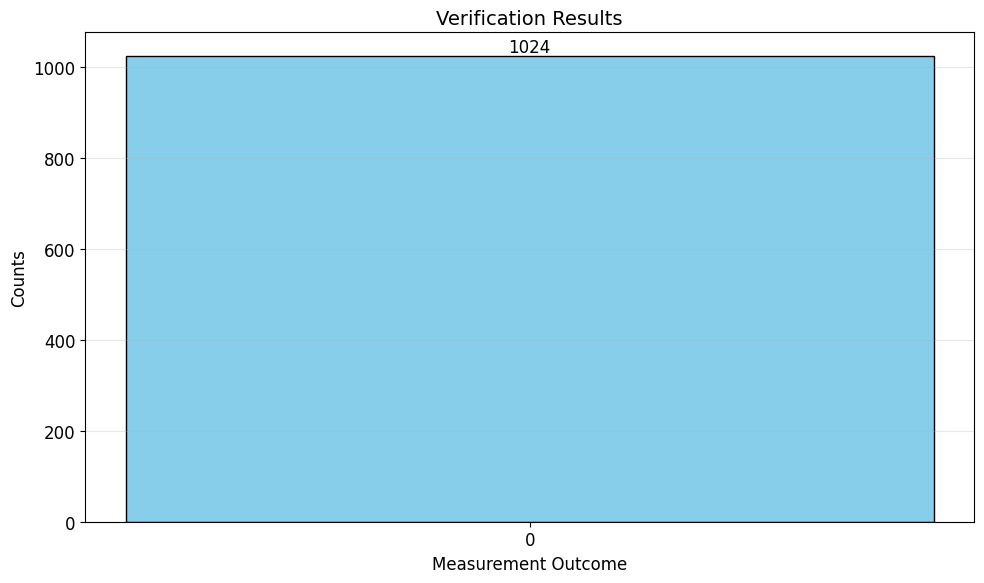

Verification success rate: 100.0%


In [ ]:
# Cell 7: Verification Circuit
def create_verification_circuit():
    qr = QuantumRegister(3)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)

    qc.x(0)
    qc.barrier()

    qc.h(1)
    qc.cx(1, 2)
    qc.barrier()

    qc.cx(0, 1)
    qc.h(0)
    qc.measure([0, 1], [0, 0])
    qc.barrier()

    qc.cx(1, 2)
    qc.cz(0, 2)
    qc.x(2)
    qc.measure(2, 0)

    return qc

verify_circuit = create_verification_circuit()
verify_counts = execute_teleportation(verify_circuit)
plot_results_matplotlib(verify_counts, "Verification Results")

total = sum(verify_counts.values())
zero_count = verify_counts.get('0', 0)
success_rate = (zero_count / total) * 100
print(f"Verification success rate: {success_rate:.1f}%")


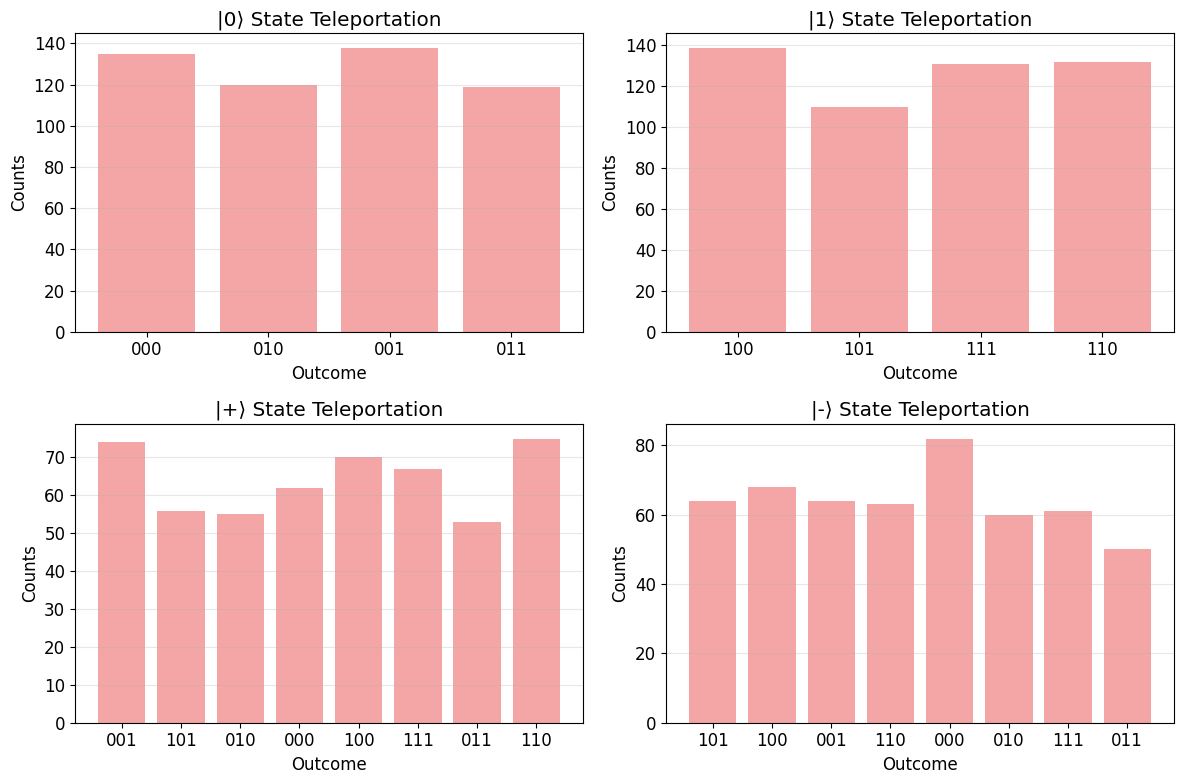

In [ ]:
# Cell 8: Multiple State Testing
def test_multiple_states():
    test_states = [
        ([1, 0], "|0⟩"),
        ([0, 1], "|1⟩"),
        ([1/np.sqrt(2), 1/np.sqrt(2)], "|+⟩"),
        ([1/np.sqrt(2), -1/np.sqrt(2)], "|-⟩")
    ]

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for i, (state_params, state_name) in enumerate(test_states):
        circuit = create_advanced_teleportation(state_params)
        counts = execute_teleportation(circuit, shots=512)

        outcomes = list(counts.keys())
        frequencies = list(counts.values())

        axes[i].bar(outcomes, frequencies, color='lightcoral', alpha=0.7)
        axes[i].set_title(f'{state_name} State Teleportation')
        axes[i].set_xlabel('Outcome')
        axes[i].set_ylabel('Counts')
        axes[i].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

test_multiple_states()


In [ ]:
# Cell 9: Statevector Analysis
def analyze_statevector():
    qr = QuantumRegister(3)
    qc = QuantumCircuit(qr)

    qc.x(0)
    state1 = Statevector.from_instruction(qc)
    print("Initial state |100⟩:")
    print(f"Statevector: {state1}")

    qc.h(1)
    qc.cx(1, 2)
    state2 = Statevector.from_instruction(qc)
    print(f"\nAfter Bell pair creation:")
    print(f"Statevector: {state2}")

    qc.cx(0, 1)
    qc.h(0)
    state3 = Statevector.from_instruction(qc)
    print(f"\nAfter Alice's operations:")
    print(f"Statevector: {state3}")

    probabilities = np.abs(state3.data) ** 2
    basis_states = ['000', '001', '010', '011', '100', '101', '110', '111']

    print(f"\nProbability distribution:")
    for basis, prob in zip(basis_states, probabilities):
        if prob > 1e-10:
            print(f"|{basis}⟩: {prob:.4f}")

analyze_statevector()


Initial state |100⟩:
Statevector: Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))

After Bell pair creation:
Statevector: Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))

After Alice's operations:
Statevector: Statevector([ 0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j,
              0. +0.j,  0. +0.j],
            dims=(2, 2, 2))

Probability distribution:
|010⟩: 0.2500
|011⟩: 0.2500
|100⟩: 0.2500
|101⟩: 0.2500
